In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.4f' % x)

PROJECT_DIR = os.path.join(os.path.dirname('augmentation.ipynb'), os.pardir) + '/..'

In [2]:
# Google Colab setup
from google.colab import drive, userdata
drive.mount('/content/drive/')
PROJECT_DIR = userdata.get('PROJECT_DIR')

Mounted at /content/drive/


In [3]:
data = pd.read_csv(f'{PROJECT_DIR}/data/processed/text_untreated.csv')
data.head()

,Accident Level,Potential Accident Level,Gender,Description,Country_Country_01,Country_Country_02,Country_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco
0,1,4,0,While removing the drill rod of the Jumbo 08 f...,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,During the activation of a sodium sulphide pum...,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,In the sub-station MILPO located at level +170...,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,Being 9:45 am. approximately in the Nv. 1880 C...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,Approximately at 11:45 a.m. in circumstances t...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Accident Level                                           418 non-null    int64 
 1   Potential Accident Level                                 418 non-null    int64 
 2   Gender                                                   418 non-null    int64 
 3   Description                                              418 non-null    object
 4   Country_Country_01                                       418 non-null    int64 
 5   Country_Country_02                                       418 non-null    int64 
 6   Country_Country_03                                       418 non-null    int64 
 7   Local_Local_01                                           418 non-null    int64 
 8   Local_Local_02                          

In [5]:
def countplot(df, col=None):
    count_plot = sns.countplot(df, x=col, stat='count') if col else sns.countplot(x=df, stat='count')
    for bars in count_plot.containers:
        for p in bars:
            count_plot.annotate(
                f'{(100 * p.get_height() / df.shape[0]) :.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='bottom'
            )

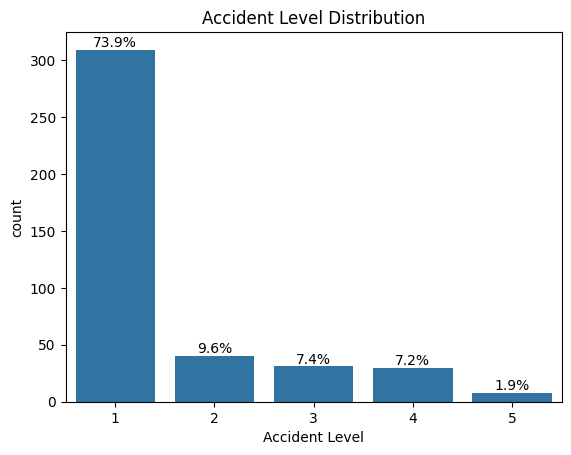

In [6]:
countplot(data, 'Accident Level')
plt.title('Accident Level Distribution');

In [7]:
from sklearn.model_selection import train_test_split

# Seperating target and predictor variables
X = data.drop(["Accident Level"], axis=1)
Y = data["Accident Level"]

# Train & test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

print('Shape of:')
print(f'Train set:', x_train.shape)
print(f'Test set:', x_test.shape)

Shape of:
Train set: (313, 57)
Test set: (105, 57)


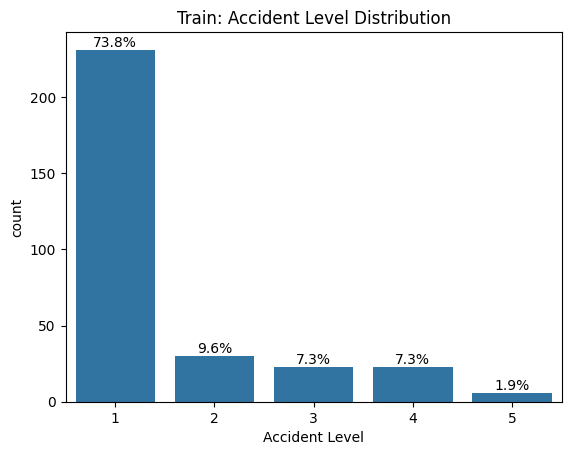

In [8]:
countplot(y_train)
plt.title('Train: Accident Level Distribution');

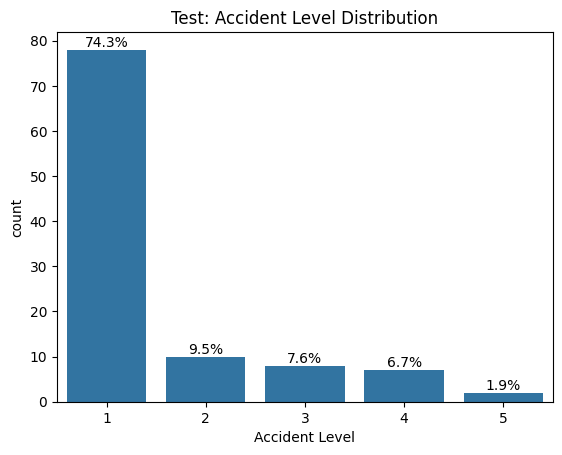

In [9]:
countplot(y_test)
plt.title('Test: Accident Level Distribution');

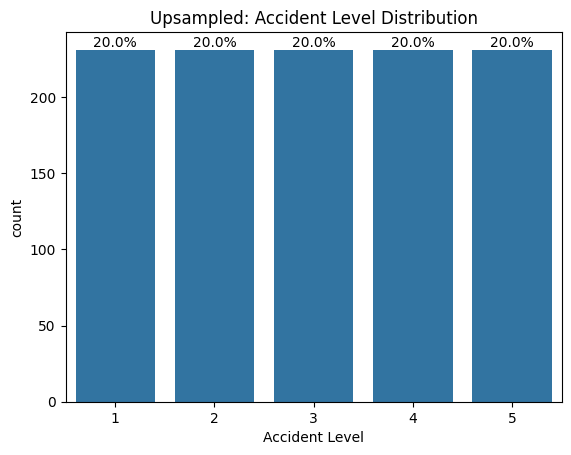

In [10]:
from imblearn.over_sampling import SMOTE

# Separating numerical and text attributes in order to appy SMOTE up-sampling
x_train_us = x_train.drop('Description', axis=1)
descriptions = x_train['Description']

smote = SMOTE(k_neighbors=5, random_state=42)
x_train_us, y_train_us = smote.fit_resample(x_train_us, y_train)

countplot(y_train_us)
plt.title('Upsampled: Accident Level Distribution');


In [11]:
# Resampling descriptions with NaN
descriptions = pd.concat([descriptions, pd.Series([np.nan] * (x_train_us.shape[0] - x_train.shape[0]), name='Description')], ignore_index=True)

# Concatenating resampled x_train and descriptions
x_train_us = pd.concat([x_train_us, descriptions], axis=1)

x_train_us.head()

,Potential Accident Level,Gender,Country_Country_01,Country_Country_02,Country_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,...,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Description
0,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,By manually moving a steel cabinet for disposa...
1,4,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Once the mooring of the faneles in the detonat...
2,4,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,When performing cleaning activity of the area ...
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The technician was doing the magnetometric sur...
4,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The operator cleaned with spatula spear throug...


In [12]:
try:
  train_us = pd.read_csv(f'{PROJECT_DIR}/data/processed/augmented_train.csv')
except FileNotFoundError:
  train_us = pd.concat([x_train_us, y_train_us], axis=1)
  train_us.to_csv(f'{PROJECT_DIR}/data/processed/augmented_train.csv', index=False)
  pd.concat([x_test, y_test]).to_csv(f'{PROJECT_DIR}/data/processed/augmented_test.csv', index=False)

train_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Potential Accident Level                                 1155 non-null   int64 
 1   Gender                                                   1155 non-null   int64 
 2   Country_Country_01                                       1155 non-null   int64 
 3   Country_Country_02                                       1155 non-null   int64 
 4   Country_Country_03                                       1155 non-null   int64 
 5   Local_Local_01                                           1155 non-null   int64 
 6   Local_Local_02                                           1155 non-null   int64 
 7   Local_Local_03                                           1155 non-null   int64 
 8   Local_Local_04                        

In [13]:
# Installing llama-cpp-python library
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.78 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 61.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 194.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 153.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 194.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvi

Loading the Quantized **Llama3-8B-Instruct** LLM <br>
<a href='https://huggingface.co/bartowski/Meta-Llama-3-8B-Instruct-GGUF/blob/main/Meta-Llama-3-8B-Instruct-Q6_K.gguf'>https://huggingface.co/bartowski/Meta-Llama-3-8B-Instruct-GGUF/blob/main/Meta-Llama-3-8B-Instruct-Q6_K.gguf</a>

In [14]:
from llama_cpp import Llama

llm = Llama(
    model_path=f'{PROJECT_DIR}/models/llms/Meta-Llama-3-8B-Instruct-Q6_K.gguf',
    n_gpu_layers=-1,
    n_ctx=2048,
    seed=42
)

llama_model_loader: loaded meta data with 26 key-value pairs and 291 tensors from /content/drive/MyDrive/industrial-safety-chatbot/models/llms/Meta-Llama-3-8B-Instruct-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = Meta-Llama-3-8B-Instruct
llama_model_loader: - kv   2:                          llama.block_count u32              = 32
llama_model_loader: - kv   3:                       llama.context_length u32              = 8192
llama_model_loader: - kv   4:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.attention.head_count u32              = 32


In [21]:
train_df = pd.concat([x_train, y_train], axis=1)
train_us_copy = train_us.copy()

prompt = '''<|start_header_id|>system<|end_header_id|>
You are a helpful assistant designed to generate synthetic textual description of an industrial accident.<|eot_id|>
<|start_header_id|>user<|end_header_id|>
Consider the following descriptions of an industrial accident that represent a severity level of {accident_level} out of 6, with 6 being extremely severe.
1. {sample1}
2. {sample2}
3. {sample3}
Generate a new description of an industrial accident that conveys the same severity level.
The new description should be precise, match the tone and context of the given examples, and containing only essential information with no new line charachters.
Ensure that the generated text contains only the accident description without acknowledging these instructions or referring to your given task.<|eot_id|>
<|start_header_id|>assistant<|end_header_id|>
'''

def generate_synthetic_description(record):
    """
    Function to replace missing Description entries with synthetically generated text.
    """
    if type(record.loc['Description']) != float:
        return record

    # Selecting random Descriptions of the same Accident Level
    random.seed(record.name)
    accident_level = record.loc['Accident Level']
    subset = train_df[train_df['Accident Level'] == accident_level]
    samples = subset.iloc[random.sample(range(0, subset.shape[0]), 3)]['Description']

    # Synthetically generating a Description text using the LLM
    completion = llm(
        prompt=prompt.format(accident_level=accident_level, sample1=samples.iloc[0], sample2=samples.iloc[1], sample3=samples.iloc[2]),
        max_tokens=8192,
        top_p=0.75,
        temperature=0.6,
        repeat_penalty=1.2,
        stop=['<|eot_id|>'],
        echo=False,
        seed=42,
    )

    # Updating the record with the new Description
    train_us_copy.loc[record.name, 'Description'] = completion['choices'][0]['text']
    train_us_copy.to_csv(f'{PROJECT_DIR}/data/processed/augmented_train.csv', index=False)

    record.loc['Description'] = completion['choices'][0]['text']
    return record

In [22]:
# Testing the function generate_synthetic_description
list(train_us.tail(5).progress_apply(generate_synthetic_description, axis=1)['Description'])

  0%|          | 0/5 [00:00<?, ?it/s]Llama.generate: prefix-match hit

llama_print_timings:        load time =     747.96 ms
llama_print_timings:      sample time =     251.90 ms /    92 runs   (    2.74 ms per token,   365.23 tokens per second)
llama_print_timings: prompt eval time =     549.59 ms /   471 tokens (    1.17 ms per token,   857.01 tokens per second)
llama_print_timings:        eval time =    3881.45 ms /    91 runs   (   42.65 ms per token,    23.44 tokens per second)
llama_print_timings:       total time =    4788.34 ms /   562 tokens
 40%|████      | 2/5 [00:04<00:07,  2.41s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =     747.96 ms
llama_print_timings:      sample time =     230.21 ms /   105 runs   (    2.19 ms per token,   456.10 tokens per second)
llama_print_timings: prompt eval time =     409.62 ms /   320 tokens (    1.28 ms per token,   781.20 tokens per second)
llama_print_timings:        eval time =    4838.95 ms /   104 runs  

["At approximately 14:15 hours on 04/05/2018, during routine maintenance operations in Cell E-421 of Sector A at the company's facility, a loud noise was heard followed by an electrical system malfunction. Immediately after, it became apparent that collaborator Rodriguez from department D-211 had suffered an electric shock and fell to the floor while attempting to access a nearby cabinet without authorization, resulting in severe injuries and subsequent loss of life.",
 'At 14:42 hours on 04/15/2022, during a routine maintenance operation in sector 3 of the chemical processing unit, an explosion occurred while attempting to purge residual gases from tank T-421. The blast was triggered by an unsecured valve that had been left open after previous work. As a result, operator Maria Rodriguez suffered severe burns on her face and arms as she attempted to flee the area. Her coworker, Juan Sanchez, received minor injuries when debris struck him in the leg.',
 "During the installation activity

In [23]:
# Text up-sampling
train_us = train_us.progress_apply(generate_synthetic_description, axis=1)
train_us.info()

Streaming output truncated to the last 5000 lines.
 38%|███▊      | 442/1155 [09:02<47:32,  4.00s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =     747.96 ms
llama_print_timings:      sample time =     200.37 ms /    88 runs   (    2.28 ms per token,   439.19 tokens per second)
llama_print_timings: prompt eval time =     503.61 ms /   407 tokens (    1.24 ms per token,   808.16 tokens per second)
llama_print_timings:        eval time =    4462.77 ms /    87 runs   (   51.30 ms per token,    19.49 tokens per second)
llama_print_timings:       total time =    5254.21 ms /   494 tokens
 38%|███▊      | 443/1155 [09:07<52:08,  4.39s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =     747.96 ms
llama_print_timings:      sample time =     180.49 ms /    74 runs   (    2.44 ms per token,   409.99 tokens per second)
llama_print_timings: prompt eval time =     418.86 ms /   297 tokens (    1.41 ms per token,   709.06 tokens per second)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Potential Accident Level                                 1155 non-null   int64 
 1   Gender                                                   1155 non-null   int64 
 2   Country_Country_01                                       1155 non-null   int64 
 3   Country_Country_02                                       1155 non-null   int64 
 4   Country_Country_03                                       1155 non-null   int64 
 5   Local_Local_01                                           1155 non-null   int64 
 6   Local_Local_02                                           1155 non-null   int64 
 7   Local_Local_03                                           1155 non-null   int64 
 8   Local_Local_04                        